# Week 17 - Supabase Task

### Task - 1 Send DHT11 Sensor Data to Supabase

**Scenario**

You’ve been asked to build a mini **“Classroom Environment Logger”** for an IT lab. The device will measure temperature and humidity using a DHT11 sensor and automatically upload readings to Supabase every minute. Teachers will use the Supabase table to view live data and later create graphs (daily trends, max/min, averages).

#### Hardware Requirement 
* Breadboard
* Raspberry Pi Pico
* DHT11
* Wi-fi networ(SSID ➕ password)
* Jumper wire

#### Deliverable

**A — Supabase database setup evidence**

1. Create a table named dht_readings with columns:

    * id (int8, primary key, identity)
    * created_at (timestamp, default now())
    * device_id (text)
    * temperature_c (numeric or float)
    * humidity_pct (numeric or float)

2. Screenshot or paste evidence of:

    * Table structure
    * One successful inserted row

**B — MicroPython program**

A working main.py that:

 * Connects to Wi-Fi
 * Reads DHT11 values
 * Sends an HTTP request to Supabase (insert row)
 * Prints success/failure status to the console
 * Uploads data on a timer (e.g., every 60 seconds)

**C — Test evidence (debug/validation)**

Console output showing:

 * Wi-Fi connected
 * Sensor readings
 * Supabase response status

* At least 3 rows inserted into Supabase

#### Step-by-step instructions

**Part 1: Build & verify the sensor locally**

1. Wire the DHT11 to the board
2. Run a simple script to print temperature and humidity
3. Confirm values update (even small changes are fine)

**Part 2: Create Supabase table + permissions**

1. Create the `dht_readings` table
2. Ensure your API key can insert rows
    * If using anon key, you may need the correct RLS policy 

3. Note your:

* `SUPABASE_URL`
* `SUPABASE_ANON_KEY`

**Part 3: Send one reading to Supabase**

1. Connect to Wi-Fi
2. Build a JSON payload
3. `POST` to Supabase REST endpoint
4. Confirm the row appears in the table

**Part 4: Automate uploads**

1. Add a loop or timer to send readings every 60 seconds
2. Add basic error handling (Wi-Fi reconnect, retry on failure)


### Task 2 - Fetch Temperature and Humidity from Supabase
**Scenario**

You are working as a junior IoT technician for a training organisation.
Another device in the classroom already uploads temperature and humidity data from a DHT11 sensor to Supabase.

Your task is to build a monitoring device that:

* Connects to Supabase
* Fetches the latest temperature and humidity reading
* Displays the data in a clear way (console /LCD 1602 )
* Confirms the data received is valid and usable

#### Learning Objectives

By completing this task, you will be able to:

* Connect a MicroPython device to Wi-Fi
* Fetch data from a Supabase REST API
* Parse JSON data in MicroPython
* Validate cloud data using simple checks
* Display cloud-fetched data in a readable format

#### Task Overview

You will write a MicroPython program that:

1. Connects to Wi-Fi
2. Sends a GET request to Supabase
3. Fetches the most recent row from dht_readings
4. Extracts temperature and humidity values
5. Validates the values
6. Displays the results

#### Hardware Requirement 
* Breadboard
* Raspberry Pi Pico
* DHT11
* LCD 1602
* Wi-fi networ(SSID ➕ password)
* Jumper wire

###  RFID-RC522
**RFID** is a wireless technology that uses radio waves to automatically identify and track objects tagged with an RFID chip. It also has a reader/writer module based on the MFRC522 chip from NXP. It is used to read data from and write data to RFID tags using a 13.56 MHz frequency. 

#### How It Works – Simple Explanation

* **RFID (Radio Frequency Identification)** is a wireless technology that uses radio waves to identify and track objects.
* The RC522 module communicates with RFID tags or cards using near-field communication (NFC) at a frequency of 13.56 MHz.
* It can read tags up to 3–5 cm away.

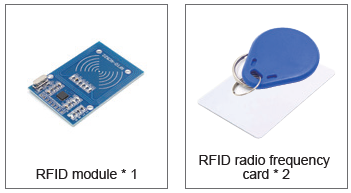


**Example Code**
````python
from mfrc522 import MFRC522
import time
 
reader = MFRC522(spi_id=0,sck=6,miso=4,mosi=7,cs=5,rst=22)
 
print("Bring TAG closer...")
print("")
 
 
while True:
    reader.init()
    (stat, tag_type) = reader.request(reader.REQIDL)
    if stat == reader.OK:
        (stat, uid) = reader.SelectTagSN()
        if stat == reader.OK:
            card = int.from_bytes(bytes(uid),"little",False)
            print("CARD ID: "+str(card))
        time.sleep_ms(500) 
````

### Task 3 -  Read RFID Card and Store Data in Supabase
**Scenario:**

You are working for a tech startup, setting up a simple attendance system for their small office. Each employee is given an RFID card. When they arrive, they scan their card, and the system logs their name and card ID to an online Supabase database.

You’ve been asked to build and test the basic functionality of this system: reading RFID cards and uploading the data to Supabase. Use an RFID-RC522 module with a Raspberry Pi Pico W to scan RFID cards. When a card is detected, send the UID along with the person's first and last name to a Supabase database.

#### Hardware Requirements
* Breadboard
* Pi Pico
* MFRC522 RFID module
* RFID card/tag
* Internet access
* Jumper wires

### Task  4 - RFID Card Authorisation System with LED Feedback
**Scenario:**

You are an IoT developer tasked with creating a basic access control system for a school’s staff room. Staff members are given RFID cards. When they scan their card at the door, the system should:

* Allow entry if their card is registered (🟩 Green RGB on).
* Deny access if their card is not found in the database (🟥 Red RGB on).

The system uses a ***Supabase database to verify card numbers** and an RGB LED for visual status feedback.

**Objective:**
Build an RFID-based access control system using a Raspberry Pi Pico W and an MFRC522 RFID module. When a card is scanned, the system checks if the card is in the Supabase database and turns on a green RGB if authorised or a red RGB if not.

#### Hardware Requirements
* Breadboard
* Pi Pico
* MFRC522 RFID module
* RFID card/tag
* RGB light
* Internet access
* Jumper wires